In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# load data

In [2]:
df_ori = pd.read_csv('BBB_planB_monthly.csv')

In [3]:
df = df_ori.copy()
pd.set_option('display.max_columns', None)
df

,T0_Act1,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T1_Act1,T1_Act12,T1_Act13,T1_Act14,T1_Act19,T1_Act2,T1_Act3,T1_Act4,T1_Act5,T1_Act6,T1_Act7,T1_Act9,T2_Act1,T2_Act12,T2_Act13,T2_Act14,T2_Act19,T2_Act2,T2_Act3,T2_Act4,T2_Act5,T2_Act6,T2_Act7,T2_Act9,T3_Act1,T3_Act12,T3_Act13,T3_Act14,T3_Act19,T3_Act2,T3_Act3,T3_Act4,T3_Act5,T3_Act6,T3_Act7,T3_Act9,T4_Act1,T4_Act12,T4_Act13,T4_Act14,T4_Act19,T4_Act2,T4_Act3,T4_Act4,T4_Act5,T4_Act6,T4_Act7,T4_Act9,T5_Act1,T5_Act12,T5_Act13,T5_Act14,T5_Act19,T5_Act2,T5_Act3,T5_Act4,T5_Act5,T5_Act6,T5_Act7,T5_Act9,T6_Act1,T6_Act12,T6_Act13,T6_Act14,T6_Act19,T6_Act2,T6_Act3,T6_Act4,T6_Act5,T6_Act6,T6_Act7,T6_Act9,T7_Act1,T7_Act12,T7_Act13,T7_Act14,T7_Act19,T7_Act2,T7_Act3,T7_Act4,T7_Act5,T7_Act6,T7_Act7,T7_Act9,T8_Act1,T8_Act12,T8_Act13,T8_Act14,T8_Act19,T8_Act2,T8_Act3,T8_Act4,T8_Act5,T8_Act6,T8_Act7,T8_Act9,T9_Act1,T9_Act12,T9_Act13,T9_Act14,T9_Act19,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9,id,final_result
0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,2.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_23629,0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,1.0,4.0,16.0,0.0,1.0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,3.0,53.0,25.0,1.0,4.0,0.0,393.0,0.0,0.0,2.0,0.0,0.0,2.0,83.0,16.0,1.0,3.0,0.0,540.0,0.0,0.0,0.0,0.0,0.0,2.0,210.0,5.0,1.0,0.0,0.0,99.0,0.0,1.0,0.0,0.0,0.0,0.0,67.0,25.0,0.0,1.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0,4.0,263.0,14.0,1.0,1.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,127.0,0.0,0.0,0.0,0.0,0.0,6.0,45.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_25107,1
2,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0,1.0,2.0,0.0,86.0,0.0,0.0,1.0,0.0,2.0,26.0,52.0,0.0,25.0,8.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,71.0,111.0,28.0,66.0,6.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,54.0,97.0,20.0,63.0,1.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,58.0,86.0,0.0,74.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,94.0,81.0,14.0,60.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,22.0,16.0,15.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,47.0,47.0,0.0,19.0,8.0,0.0,60.0,0.0,0.0,1.0,0.0,0.0,64.0,55.0,0.0,35.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_29144,0
3,119.0,0.0,2.0,3.0,0.0,1.0,44.0,103.0,0.0,35.0,25.0,0.0,497.0,0.0,2.0,0.0,0.0,0.0,88.0,163.0,0.0,101.0,10.0,0.0,714.0,0.0,1.0,0.0,0.0,0.0,28.0,248.0,16.0,32.0,3.0,0.0,725.0,0.0,0.0,0.0,0.0,0.0,33.0,224.0,12.0,13.0,0.0,0.0,311.0,0.0,1.0,0.0,0.0,0.0,6.0,123.0,0.0,7.0,5.0,0.0,508.0,0.0,0.0,0.0,0.0,0.0,4.0,133.0,27.0,5.0,2.0,0.0,288.0,0.0,0.0,0.0,0.0,0.0,13.0,76.0,2.0,6.0,3.0,0.0,451.0,0.0,5.0,0.0,0.0,0.0,9.0,153.0,12.0,21.0,3.0,0.0,348.0,0.0,0.0,0.0,0.0,0.0,9.0,118.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_31663,1
4,7.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,1.0,3.0,0.0,73.0,0.0,0.0,1.0,0.0,0.0,18.0,32.0,2.0,9.0,6.0,0.0,88.0,0.0,0.0,25.0,0.0,0.0,27.0,41.0,14.0,12.0,6.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,10.0,37.0,13.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,23.0,25.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BBB_2013B_34229,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

# prepare X and y

In [4]:
X = df.drop(['final_result','id'], axis=1)
X

,T0_Act1,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T1_Act1,T1_Act12,T1_Act13,T1_Act14,T1_Act19,T1_Act2,T1_Act3,T1_Act4,T1_Act5,T1_Act6,T1_Act7,T1_Act9,T2_Act1,T2_Act12,T2_Act13,T2_Act14,T2_Act19,T2_Act2,T2_Act3,T2_Act4,T2_Act5,T2_Act6,T2_Act7,T2_Act9,T3_Act1,T3_Act12,T3_Act13,T3_Act14,T3_Act19,T3_Act2,T3_Act3,T3_Act4,T3_Act5,T3_Act6,T3_Act7,T3_Act9,T4_Act1,T4_Act12,T4_Act13,T4_Act14,T4_Act19,T4_Act2,T4_Act3,T4_Act4,T4_Act5,T4_Act6,T4_Act7,T4_Act9,T5_Act1,T5_Act12,T5_Act13,T5_Act14,T5_Act19,T5_Act2,T5_Act3,T5_Act4,T5_Act5,T5_Act6,T5_Act7,T5_Act9,T6_Act1,T6_Act12,T6_Act13,T6_Act14,T6_Act19,T6_Act2,T6_Act3,T6_Act4,T6_Act5,T6_Act6,T6_Act7,T6_Act9,T7_Act1,T7_Act12,T7_Act13,T7_Act14,T7_Act19,T7_Act2,T7_Act3,T7_Act4,T7_Act5,T7_Act6,T7_Act7,T7_Act9,T8_Act1,T8_Act12,T8_Act13,T8_Act14,T8_Act19,T8_Act2,T8_Act3,T8_Act4,T8_Act5,T8_Act6,T8_Act7,T8_Act9,T9_Act1,T9_Act12,T9_Act13,T9_Act14,T9_Act19,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9
0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,2.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,18.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,1.0,4.0,16.0,0.0,1.0,4.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,3.0,53.0,25.0,1.0,4.0,0.0,393.0,0.0,0.0,2.0,0.0,0.0,2.0,83.0,16.0,1.0,3.0,0.0,540.0,0.0,0.0,0.0,0.0,0.0,2.0,210.0,5.0,1.0,0.0,0.0,99.0,0.0,1.0,0.0,0.0,0.0,0.0,67.0,25.0,0.0,1.0,0.0,181.0,0.0,0.0,0.0,0.0,0.0,4.0,263.0,14.0,1.0,1.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,127.0,0.0,0.0,0.0,0.0,0.0,6.0,45.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.0,0.0,1.0,2.0,0.0,86.0,0.0,0.0,1.0,0.0,2.0,26.0,52.0,0.0,25.0,8.0,0.0,123.0,0.0,0.0,0.0,0.0,0.0,71.0,111.0,28.0,66.0,6.0,0.0,76.0,0.0,0.0,0.0,0.0,0.0,54.0,97.0,20.0,63.0,1.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,58.0,86.0,0.0,74.0,1.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,94.0,81.0,14.0,60.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,22.0,16.0,15.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0,47.0,47.0,0.0,19.0,8.0,0.0,60.0,0.0,0.0,1.0,0.0,0.0,64.0,55.0,0.0,35.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,119.0,0.0,2.0,3.0,0.0,1.0,44.0,103.0,0.0,35.0,25.0,0.0,497.0,0.0,2.0,0.0,0.0,0.0,88.0,163.0,0.0,101.0,10.0,0.0,714.0,0.0,1.0,0.0,0.0,0.0,28.0,248.0,16.0,32.0,3.0,0.0,725.0,0.0,0.0,0.0,0.0,0.0,33.0,224.0,12.0,13.0,0.0,0.0,311.0,0.0,1.0,0.0,0.0,0.0,6.0,123.0,0.0,7.0,5.0,0.0,508.0,0.0,0.0,0.0,0.0,0.0,4.0,133.0,27.0,5.0,2.0,0.0,288.0,0.0,0.0,0.0,0.0,0.0,13.0,76.0,2.0,6.0,3.0,0.0,451.0,0.0,5.0,0.0,0.0,0.0,9.0,153.0,12.0,21.0,3.0,0.0,348.0,0.0,0.0,0.0,0.0,0.0,9.0,118.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,1.0,3.0,0.0,73.0,0.0,0.0,1.0,0.0,0.0,18.0,32.0,2.0,9.0,6.0,0.0,88.0,0.0,0.0,25.0,0.0,0.0,27.0,41.0,14.0,12.0,6.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,10.0,37.0,13.0,4.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,2.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,1.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,16.0,16.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,12.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,23.0,25.0,0.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [5]:
y = df['final_result']
y

0       0
1       1
2       0
3       1
4       1
       ..
5336    1
5337    1
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64

In [6]:
# convert to numpy array
X = X.values
y = y.values

In [8]:
type(X)

numpy.ndarray

In [9]:
type(y)

numpy.ndarray

In [7]:
X_train1, X_test1, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [9]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 120)
(1603, 120)
(3738,)
(1603,)


In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train1)
X_test = min_max_scaler.fit_transform(X_test1)

In [11]:
# reshape into correct dimensions to input into cnn
X_train = X_train.reshape(3738,120,1)
X_test = X_test.reshape(1603,120,1)

# build CNN model

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [17]:
X_train.shape[1:]

(120, 1)

In [18]:
batch_size = 128

In [39]:
## 
epochs = 200
lr=0.0001 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4056 - accuracy: 0.8677 (epochs = 100, lr=0.01) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

##  loss: 0.3739 - accuracy: 0.8615 (epochs = 200, lr=0.001) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3783 - accuracy: 0.8677 (epochs = 100, lr=0.001) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.3962 - accuracy: 0.8765 (epochs = 200, lr=0.0001) --> best

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4168 - accuracy: 0.8671 (epochs = 100, lr=0.0001) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

In [40]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 59, 64)            256       
                                                                 
 activation_5 (Activation)   (None, 59, 64)            0         
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 29, 64)           0         
 1D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 29, 64)            0         
                                                                 
 flatten_5 (Flatten)         (None, 1856)              0         
                                                                 
 dense_5 (Dense)             (None, 1)                 1857      
                                                      

# fit CNN model

In [41]:
history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/200
30/30 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5637 - val_loss: 0.6824 - val_accuracy: 0.7012
Epoch 2/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6777 - accuracy: 0.7022 - val_loss: 0.6675 - val_accuracy: 0.7024
Epoch 3/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6618 - accuracy: 0.7025 - val_loss: 0.6486 - val_accuracy: 0.7024
Epoch 4/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.7025 - val_loss: 0.6268 - val_accuracy: 0.7024
Epoch 5/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6209 - accuracy: 0.7025 - val_loss: 0.6065 - val_accuracy: 0.7024
Epoch 6/200
30/30 [==============================] - 0s 4ms/step - loss: 0.6037 - accuracy: 0.7025 - val_loss: 0.5922 - val_accuracy: 0.7024
Epoch 7/200
30/30 [==============================] - 0s 4ms/step - loss: 0.5920 - accuracy: 0.7025 - val_loss: 0.5843 - val_accuracy: 0.7024
Epoch 8/200
3

Epoch 59/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4561 - accuracy: 0.8109 - val_loss: 0.4486 - val_accuracy: 0.8104
Epoch 60/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4549 - accuracy: 0.8122 - val_loss: 0.4473 - val_accuracy: 0.8147
Epoch 61/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4535 - accuracy: 0.8184 - val_loss: 0.4461 - val_accuracy: 0.8172
Epoch 62/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4525 - accuracy: 0.8213 - val_loss: 0.4452 - val_accuracy: 0.8197
Epoch 63/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4513 - accuracy: 0.8218 - val_loss: 0.4440 - val_accuracy: 0.8222
Epoch 64/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4499 - accuracy: 0.8272 - val_loss: 0.4428 - val_accuracy: 0.8284
Epoch 65/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.8296 - val_loss: 0.4412 - val_accuracy: 0.8309
Epoch 

30/30 [==============================] - 0s 4ms/step - loss: 0.4074 - accuracy: 0.8692 - val_loss: 0.4020 - val_accuracy: 0.8784
Epoch 117/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4072 - accuracy: 0.8703 - val_loss: 0.4017 - val_accuracy: 0.8777
Epoch 118/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4067 - accuracy: 0.8694 - val_loss: 0.4015 - val_accuracy: 0.8771
Epoch 119/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4068 - accuracy: 0.8705 - val_loss: 0.4020 - val_accuracy: 0.8771
Epoch 120/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4071 - accuracy: 0.8694 - val_loss: 0.4019 - val_accuracy: 0.8777
Epoch 121/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4060 - accuracy: 0.8678 - val_loss: 0.4009 - val_accuracy: 0.8765
Epoch 122/200
30/30 [==============================] - 0s 4ms/step - loss: 0.4056 - accuracy: 0.8708 - val_loss: 0.4008 - val_accuracy: 0.8765
Epoch 123/200

30/30 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8708 - val_loss: 0.3972 - val_accuracy: 0.8790
Epoch 174/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8708 - val_loss: 0.3969 - val_accuracy: 0.8771
Epoch 175/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3970 - accuracy: 0.8729 - val_loss: 0.3971 - val_accuracy: 0.8784
Epoch 176/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3979 - accuracy: 0.8740 - val_loss: 0.3974 - val_accuracy: 0.8784
Epoch 177/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3992 - accuracy: 0.8729 - val_loss: 0.3968 - val_accuracy: 0.8771
Epoch 178/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3983 - accuracy: 0.8724 - val_loss: 0.3967 - val_accuracy: 0.8771
Epoch 179/200
30/30 [==============================] - 0s 4ms/step - loss: 0.3981 - accuracy: 0.8719 - val_loss: 0.3970 - val_accuracy: 0.8784
Epoch 180/200

In [42]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 598us/step - loss: 0.3962 - accuracy: 0.8765


[0.3962026536464691, 0.8764815926551819]

# plot CNN learning process

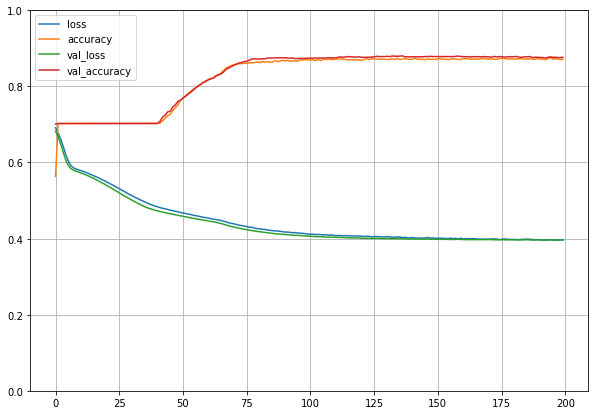

In [43]:
import pandas as pd

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## loss: 0.4214 - accuracy: 0.8718 (lr=0.0001) -->best

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

##  loss: 0.3746 - accuracy: 0.8550 (lr=0.001) 

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4023 - accuracy: 0.8428 (lr=0.01) (filters=64)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

##  loss: 0.4496 - accuracy: 0.8531 (lr=0.01) (filters=128)

model = Sequential()
model.add(Conv1D(filters=128,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])